# Task Description

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## About the dataset

Dataset - Titanic <br>
Description - This dataset is the passenger manifest for the Titanic, with various attributes recorded for each passenger such as their demographics, ticket details, and survival status.
Columns - 
- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or not (0).
- Pclass: Representing first, second, and third class
- Name: Name of the passenger.
- Sex: Gender of the passenger (male or female).
- Age: Age of the passenger. 
- SibSp: Number of siblings or spouses aboard the Titanic.
- Parch: Number of parents or children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Fare paid by the passenger.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

I. Introduction

1. Importing the packages

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
import cufflinks as cf
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

2. Importing the dataset

In [123]:
df = pd.read_csv("./dataset/titanic.csv")

3. Cleaning the dataset

In [124]:
df.profile_report(title="Titanic Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As the there are too many values in the 'Age' & 'Cabin' column, we cannot drop it. Therefore, we need to fill the null values in these columns.

In [126]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [127]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [128]:
df.dropna(inplace=True)

In [129]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [130]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [131]:
df.duplicated().sum()

0

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [133]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.315152    0.524184   
std     256.998173    0.486260    0.834700   12.984932    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [134]:
#As the Age column cannot be in float format, we are converting it to be of type int
df['Age'] = df['Age'].astype('int')

In [135]:
df['Age'].value_counts()

Age
28    204
24     31
22     27
30     27
18     26
     ... 
66      1
53      1
80      1
12      1
74      1
Name: count, Length: 71, dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int32  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 86.8+ KB


II. Data Analysis

In [137]:
#Creating 2 dataframes which includes only either numerical data or categorical data
numerical_data=df.select_dtypes(include=['number'])
categorical_data = df.select_dtypes(include=['object'])
numerical_data

PassengerId  Survived  Pclass  Age  SibSp  Parch     Fare
0              1         0       3   22      1      0   7.2500
1              2         1       1   38      1      0  71.2833
2              3         1       3   26      0      0   7.9250
3              4         1       1   35      1      0  53.1000
4              5         0       3   35      0      0   8.0500
..           ...       ...     ...  ...    ...    ...      ...
886          887         0       2   27      0      0  13.0000
887          888         1       1   19      0      0  30.0000
888          889         0       3   28      1      2  23.4500
889          890         1       1   26      0      0  30.0000
890          891         0       3   32      0      0   7.7500

[889 rows x 7 columns]

In [138]:
categorical_data

Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket    Cabin Embarked  
0           A/5 21171  B96 B98        S  
1            PC 17599      C85        C  
2    STON/O2. 3101282  B96 B98        S  
3              113803     C123        S  
4              373450  B96 B98        S  
..                ...      ...      ...  
886            211536  B96 B98        S  
887            112053      B42        S  
888        W./C. 6607  B96 B98        S  
889            111369     C148        C  
890            370376  B96 B98        Q  

[889 rows x 5 columns]

Univariate Analysis

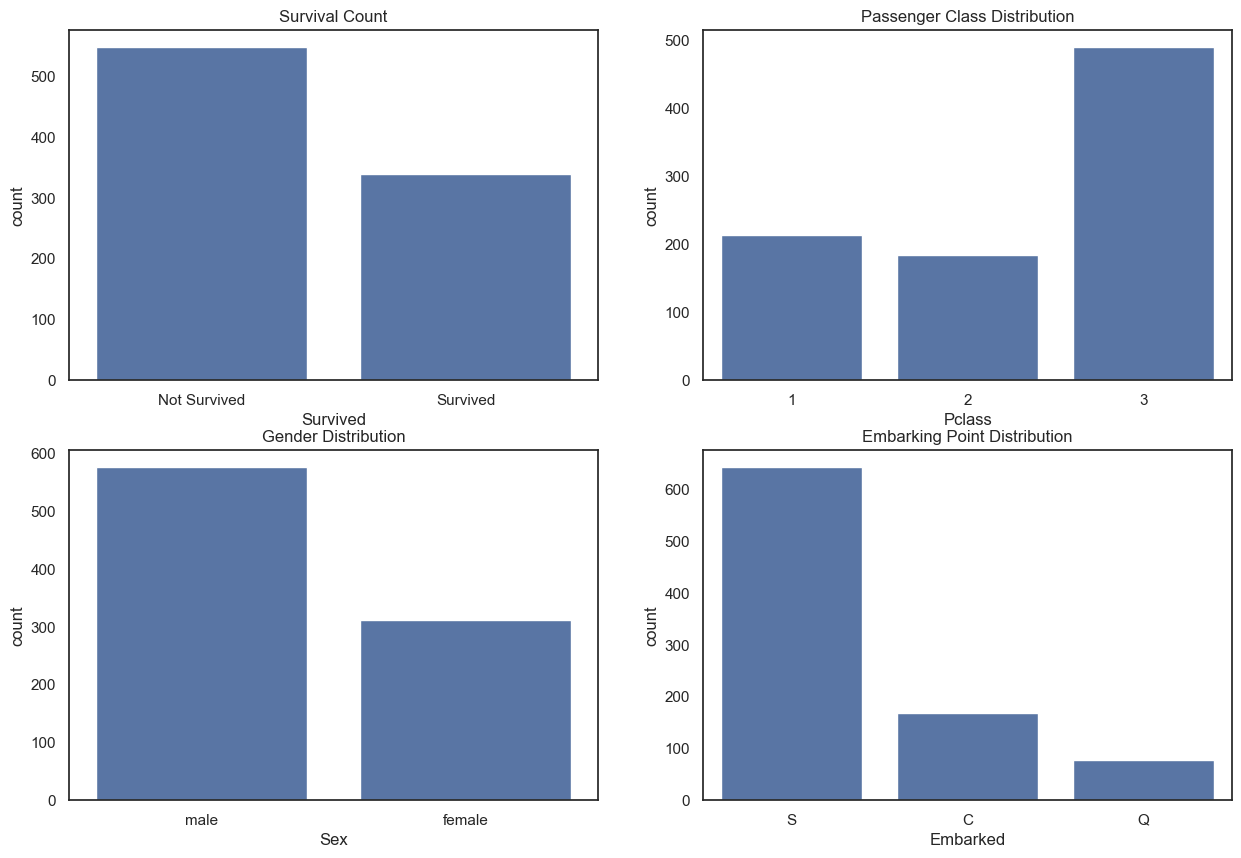

In [139]:
figs, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='Survived', ax=axs[0, 0])
axs[0, 0].set_xticks([0,1],['Not Survived', 'Survived'])
axs[0, 0].set_title('Survival Count')

sns.countplot( data=df,x='Pclass', ax=axs[0, 1])
axs[0, 1].set_title('Passenger Class Distribution')

sns.countplot(data=df,x='Sex', ax=axs[1, 0])
axs[1, 0].set_title('Gender Distribution')

sns.countplot(data=df,x='Embarked', ax=axs[1, 1])
axs[1, 1].set_title('Embarking Point Distribution')

plt.show()

    Visualization
1. A large number of passengers had not survived.
2. Most of the passengers were in the 3rd class 
3. There were slightly higher number of passengers in 1st class rather than 2nd class
4. Most of the passengers onboard the Titanic were Male
5. Majority of the passengers had embarked from the port of *Southampton*


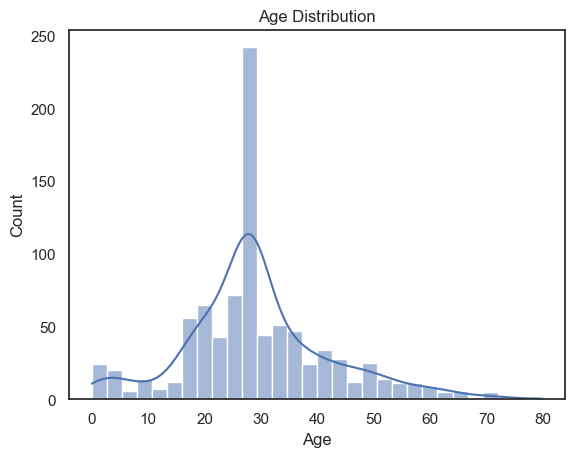

In [140]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

    Visualization
1. More than 200 of the passengers were of the age 28 (This could also be true considering that we filled the Null values with the mean of the *Age* column).
2. Most of the passengers were between the ages of 20 and 40.
3. There were children aboard the Titanic than the elderly.

Bivariate Analysis

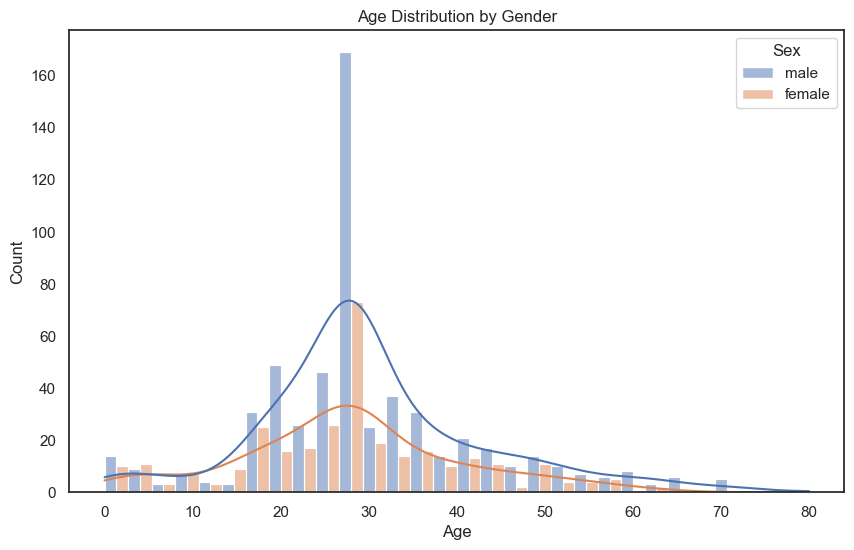

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age',kde=True,hue='Sex', multiple="dodge")
plt.title("Age Distribution by Gender")
plt.show()

    Visualization
1. Most of the passengers were of the age 28
2. Out of those passengers, most of them were Male.
3. There were more Males across all the age group (considering there were a majority of Males aboard)
4. There were barely any female passengers above the age of 60

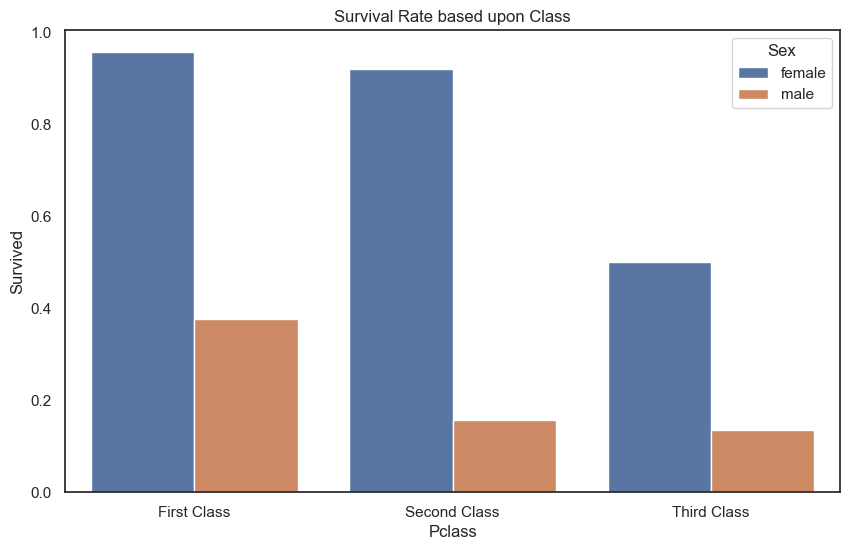

In [142]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Pclass', y='Survived',hue='Sex',errorbar=None)
plt.title("Survival Rate based upon Class")
plt.xticks([0,1,2], ['First Class', 'Second Class','Third Class'])
plt.show()

    Visualization
1. More Females have survived than Males.
2. Lesser number of people in the 3rd class have survived than 1st class.
3. Compared to 1st and 2nd class, there were a higher number of Males who survived in 1st class than 2nd class

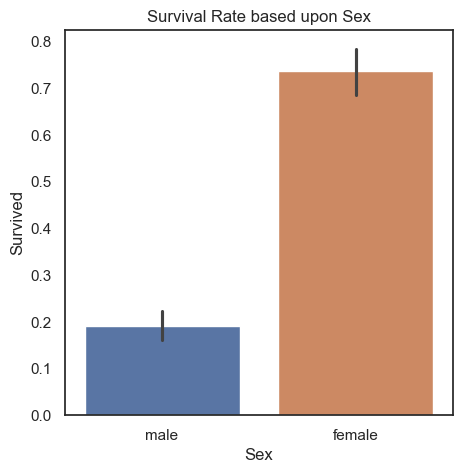

In [143]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='Sex', y='Survived', hue="Sex")
plt.title('Survival Rate based upon Sex')
plt.show()

    Visualization
1. A much higher number of Females than Males have survived.

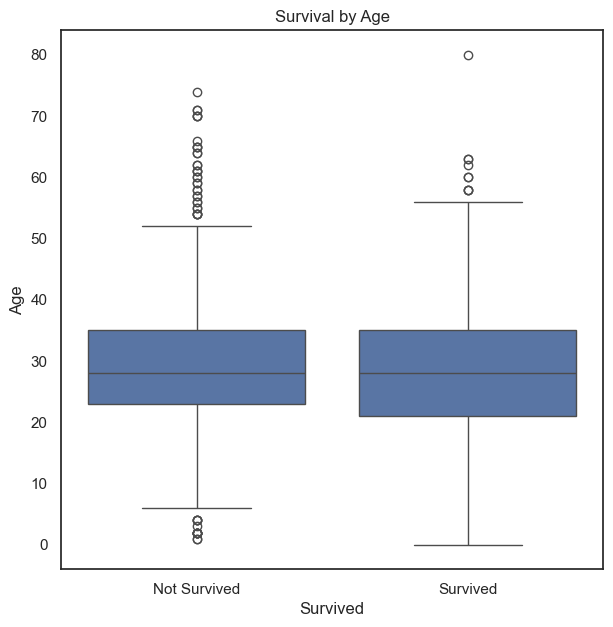

In [144]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

    Visualization
1. There is a large age variance between 20 and 35 of the people who survived.
2. There were many outliers of the age above 60 of the people who did not survive.

In [145]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().iplot(kind='bar')

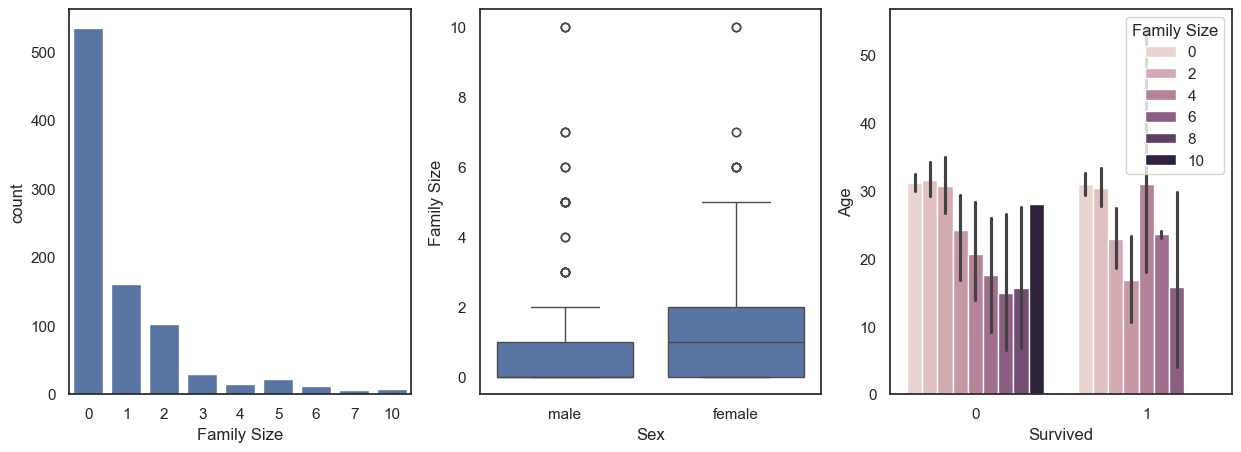

In [146]:
#Total Family size will be the sum of the Sibling/Spouses and the Parents/Children
df['Family Size']=df['SibSp']+df['Parch']

figs, axs = plt.subplots(1,3, figsize=(15, 5))
sns.countplot(data=df,x="Family Size", ax=axs[0])
sns.boxplot(data=df, x='Sex', y='Family Size',ax=axs[1])
sns.barplot(data=df,x="Survived",y="Age", hue="Family Size",ax=axs[2])
plt.show()

    Visualization
1. Most of the passengers aboard the Titanic were travelling by themselves with a very few travelling with their families.
2. The families consisted mostly of females than males.
3. Many families did not not survive.
4. A family of 10 did not survive.
5. Families with more than 4 people had a higher survival rate.

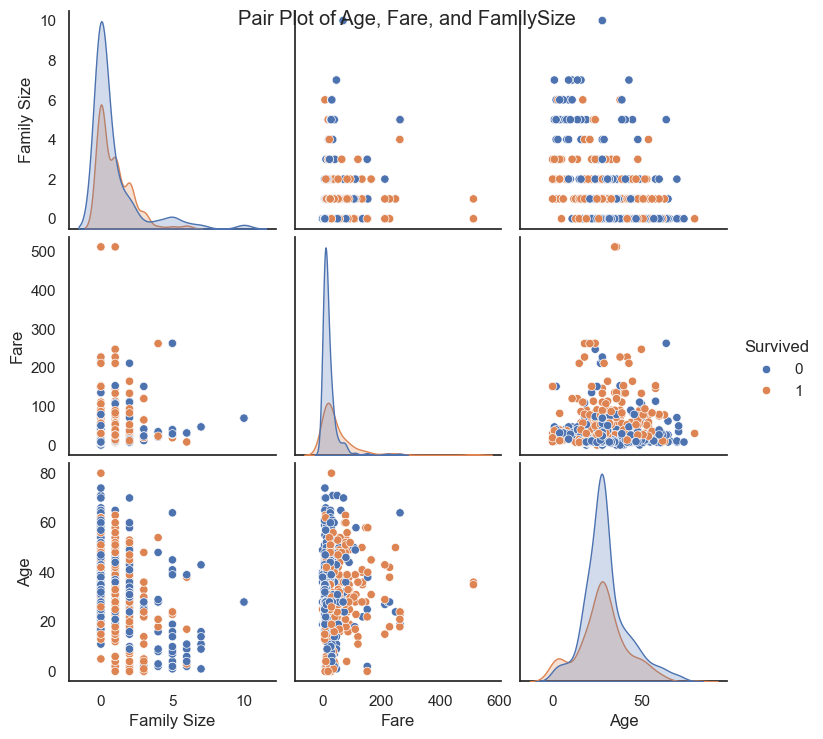

In [147]:
sns.pairplot(df, vars=['Family Size', 'Fare', 'Age'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, and FamilySize')
plt.show()

    Visualization
1. While this pair plot provides valuable insights into the relationships between these variables and survival, but correlation does not imply causation. Other factors such as gender, passenger class, and cabin location could also play significant roles in determining survival outcomes.

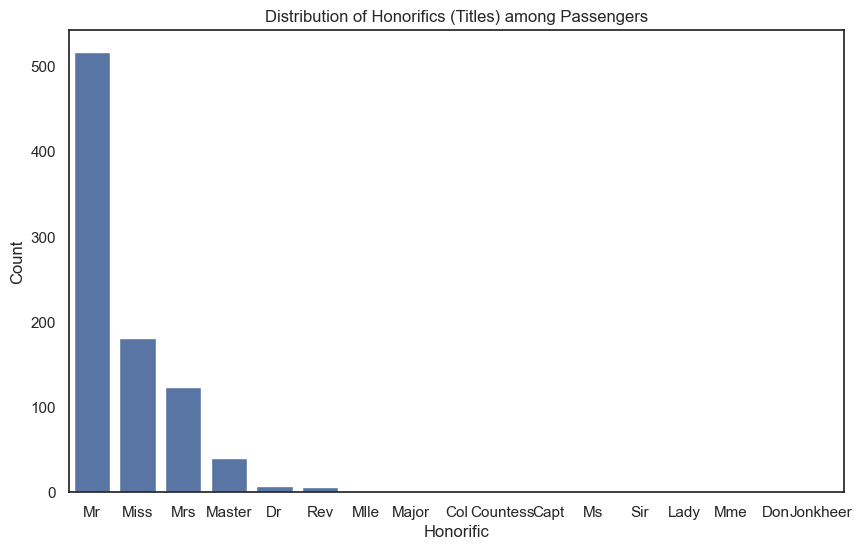

In [148]:
#Extracting the honorific from the names of the passengers
df['Honorific'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Honorific', order=df['Honorific'].value_counts().index)
plt.title('Distribution of Honorifics (Titles) among Passengers')
plt.xlabel('Honorific')
plt.ylabel('Count')
plt.show()

    Visualization
1. The majority of the people aboard had the Honorific of __Mr__.
2. There were more unmarried females than married females aboard the Titanic.

In [149]:
fig1 = px.bar(categorical_data, x='Sex', title='Number of Male and Female Passengers')
fig1.update_layout(
    template="plotly_dark",
    title_font_size=24,
    title_font_color="white",
    paper_bgcolor="black",
    plot_bgcolor="black",
    font_color="white"
)

fig2 = px.pie(categorical_data, names='Embarked', title='Distribution of Passengers by Port of Embarkation')

categorical_data['Ticket_Encoded'] = pd.factorize(categorical_data['Ticket'])[0]
categorical_data['Cabin_Encoded'] = pd.factorize(categorical_data['Cabin'])[0]
fig3 = px.scatter(categorical_data, x='Ticket_Encoded', y='Cabin_Encoded', color='Sex', title='Ticket vs Cabin (encoded)', labels={'Ticket_Encoded': 'Ticket (encoded)', 'Cabin_Encoded': 'Cabin (encoded)'})

fig1.show()
fig2.show()
fig3.show()

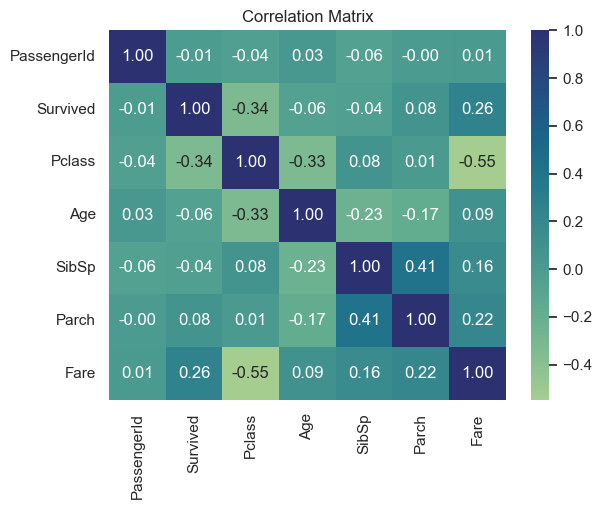

In [150]:
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="crest", cbar=True)
plt.title('Correlation Matrix')
plt.show()

    Visualization
1. There is a 0.26 correlation between *Fare* & *Survived* which might indicate that passengers who paid a higher fare had a higher chance of 
2. The negative correlation between Pclass and Fare in the Titanic dataset reflects the pricing structure of tickets based on socio-economic status and the level of comfort and amenities provided to passengers in different ticket classes. (Person in 1st Class will pay a much higher ticket price than that of 3rd Class)
3. Positive Correlation in *Parch* and *Fare* indicates that a person with more children/people had paid a higher fare price.